Importing All Neccessary Modules / Libraries

In [74]:
import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from scipy.signal import convolve
import matplotlib.pyplot as plt
import seaborn as sns
from AccelerometerDropTest import AccelerometerDropTest

Creating a Dictionary for all the Tests Objects in a Specified Folder

In [75]:
folder = r'/home/jamie/Documents/Accelerometer_Drop_Testing/2023-05-26 Drop Test C25'
sample_rate_hz = 200
Accelerometer_dfs = {}

for filename in os.listdir(folder):

    if filename.endswith('.csv'):
        filepath = os.path.join(folder, filename)
        Accelerometer_dfs[str(filename)[:-4]] = AccelerometerDropTest(filepath,sample_rate_hz)

for key in Accelerometer_dfs.keys():
    print('Key: {key}'.format(key=key))

Key: Control
Key: Test 1
Key: test 2


In [82]:
for key in Accelerometer_dfs.keys():
    buffer_indexes = 30
    threshold_index_accelerometer = Accelerometer_dfs[key].data['Acceleration m/s^2'].idxmax() - buffer_indexes/2
    Accelerometer_dfs[key].data = Accelerometer_dfs[key].data.loc[threshold_index_accelerometer:threshold_index_accelerometer + buffer_indexes]
    Accelerometer_dfs[key].data['Time (ms)'] = Accelerometer_dfs[key].data['Time (ms)'] - Accelerometer_dfs[key].data['Time (ms)'].min()

Plotting the Accelerometer Data

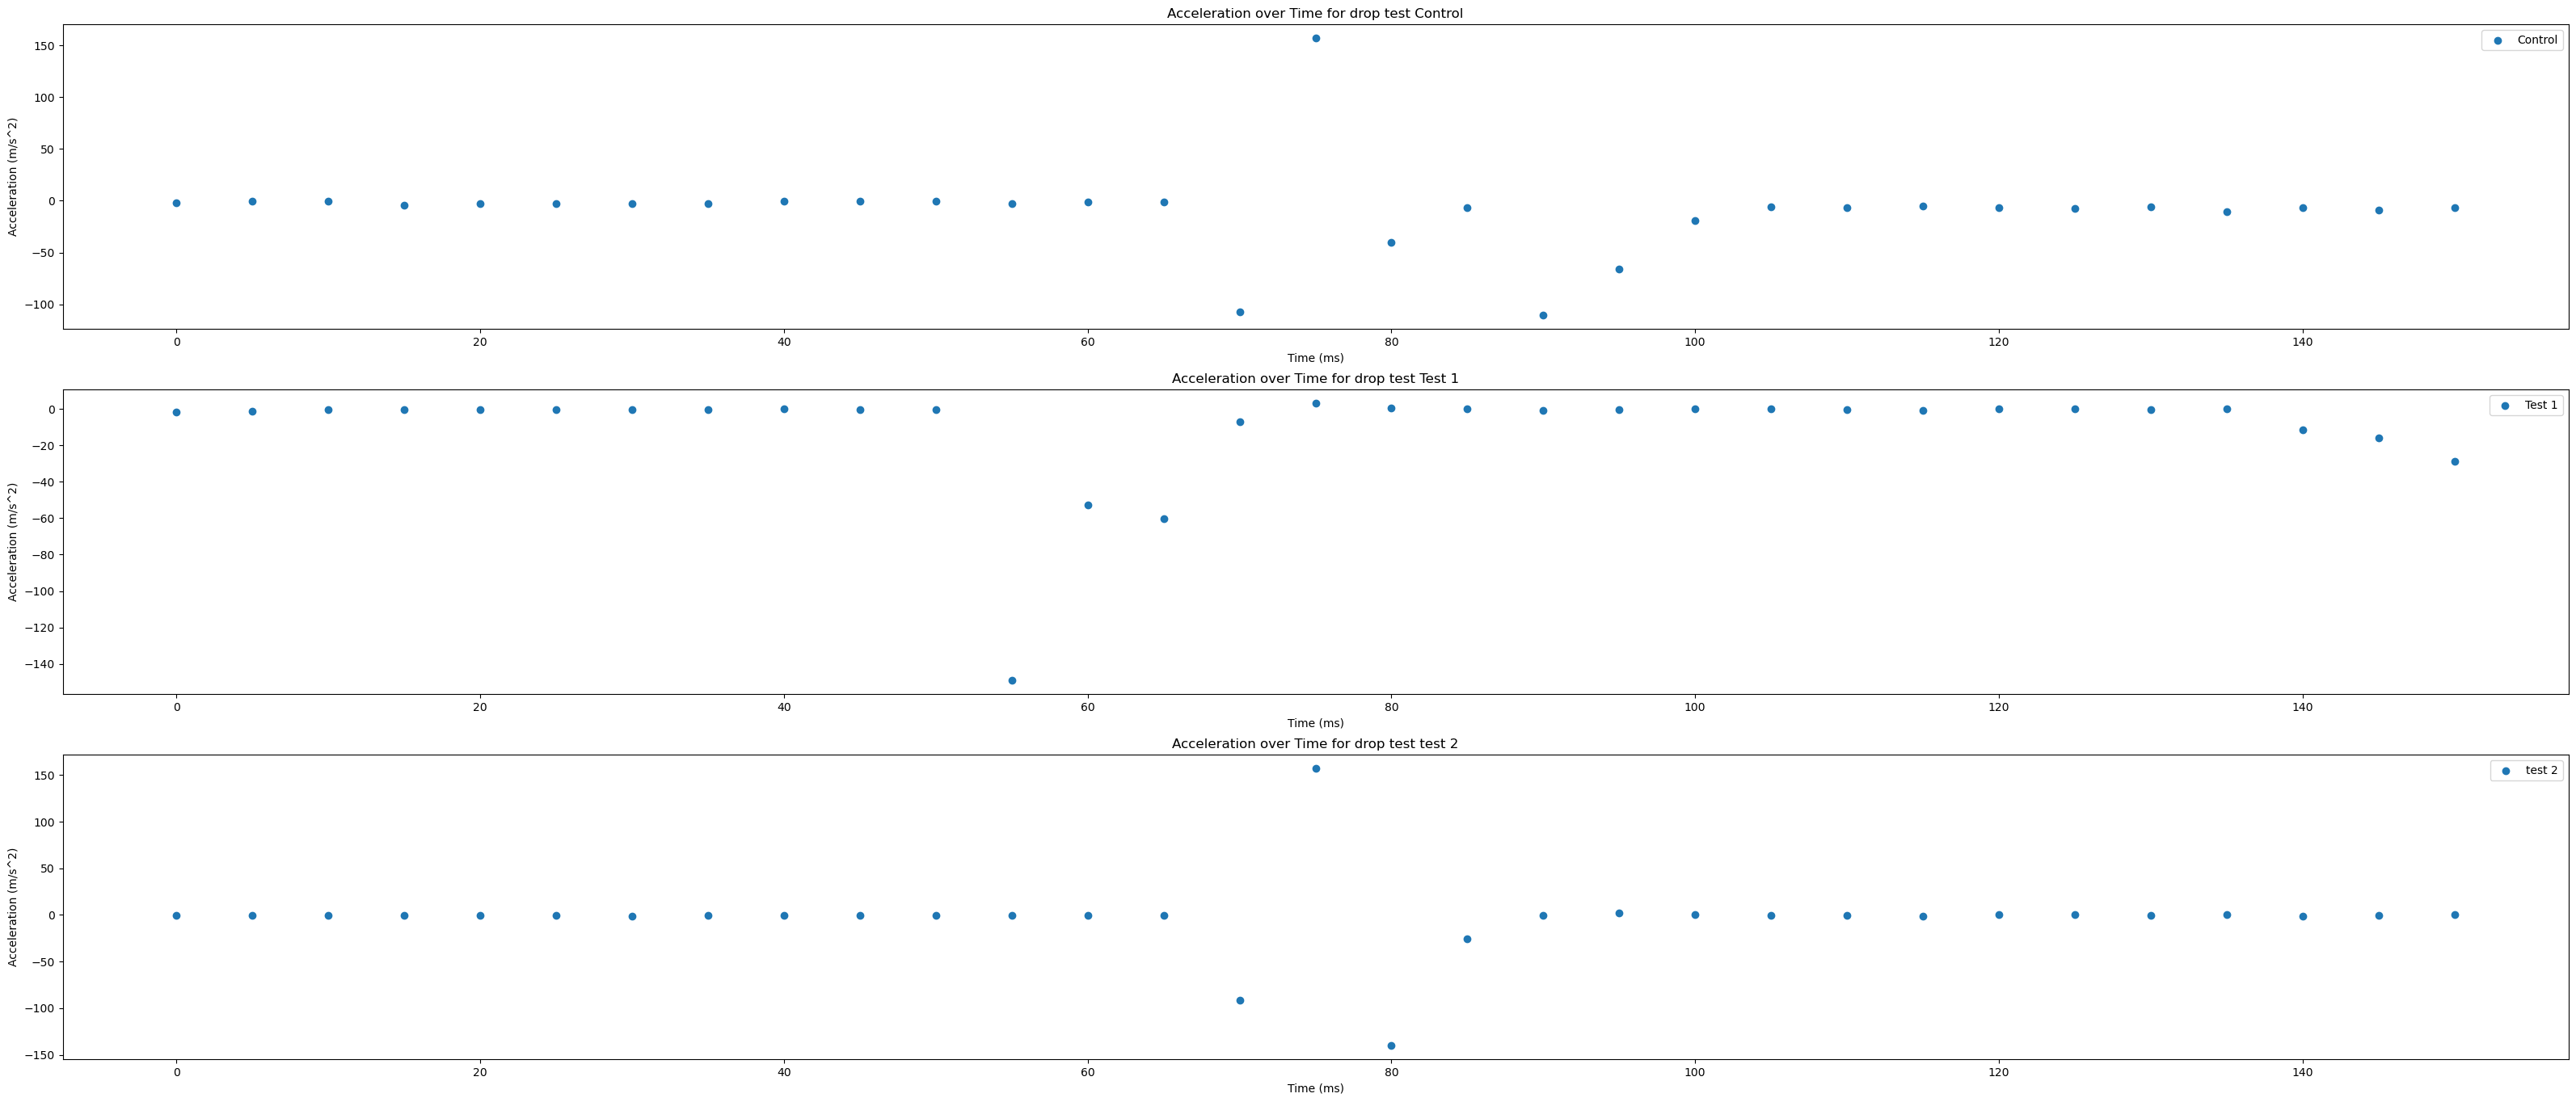

In [83]:
scaling_factor = 2.5
plt.figure(figsize=(16*scaling_factor,9*scaling_factor))

for i,key in enumerate(Accelerometer_dfs.keys()):
    plt.subplot(len(Accelerometer_dfs.keys())+1,1,i+1)
    plt.scatter(x=Accelerometer_dfs[key].data['Time (ms)'],y=Accelerometer_dfs[key].data["Acceleration m/s^2"],label=key)

    
    plt.ylabel("Acceleration (m/s^2)")
    plt.xlabel("Time (ms)")

    plt.legend()
    plt.title('Acceleration over Time for drop test {key}'.format(key=key))

In [80]:
for key in Accelerometer_dfs.keys():
    Accelerometer_dfs[key].interpolate_acceleration()
    Accelerometer_dfs[key].convolve_acceleration(10)
    
    buffer_indexes = 1400
    threshold_index_accelerometer = Accelerometer_dfs[key].TC_data['Convolved Acceleration m/s^2'].idxmax() - buffer_indexes/2
    Accelerometer_dfs[key].TC_data = Accelerometer_dfs[key].TC_data.loc[threshold_index_accelerometer:threshold_index_accelerometer + buffer_indexes]
    Accelerometer_dfs[key].TC_data['Time (ms)'] = Accelerometer_dfs[key].TC_data['Time (ms)'] - Accelerometer_dfs[key].TC_data['Time (ms)'].min()

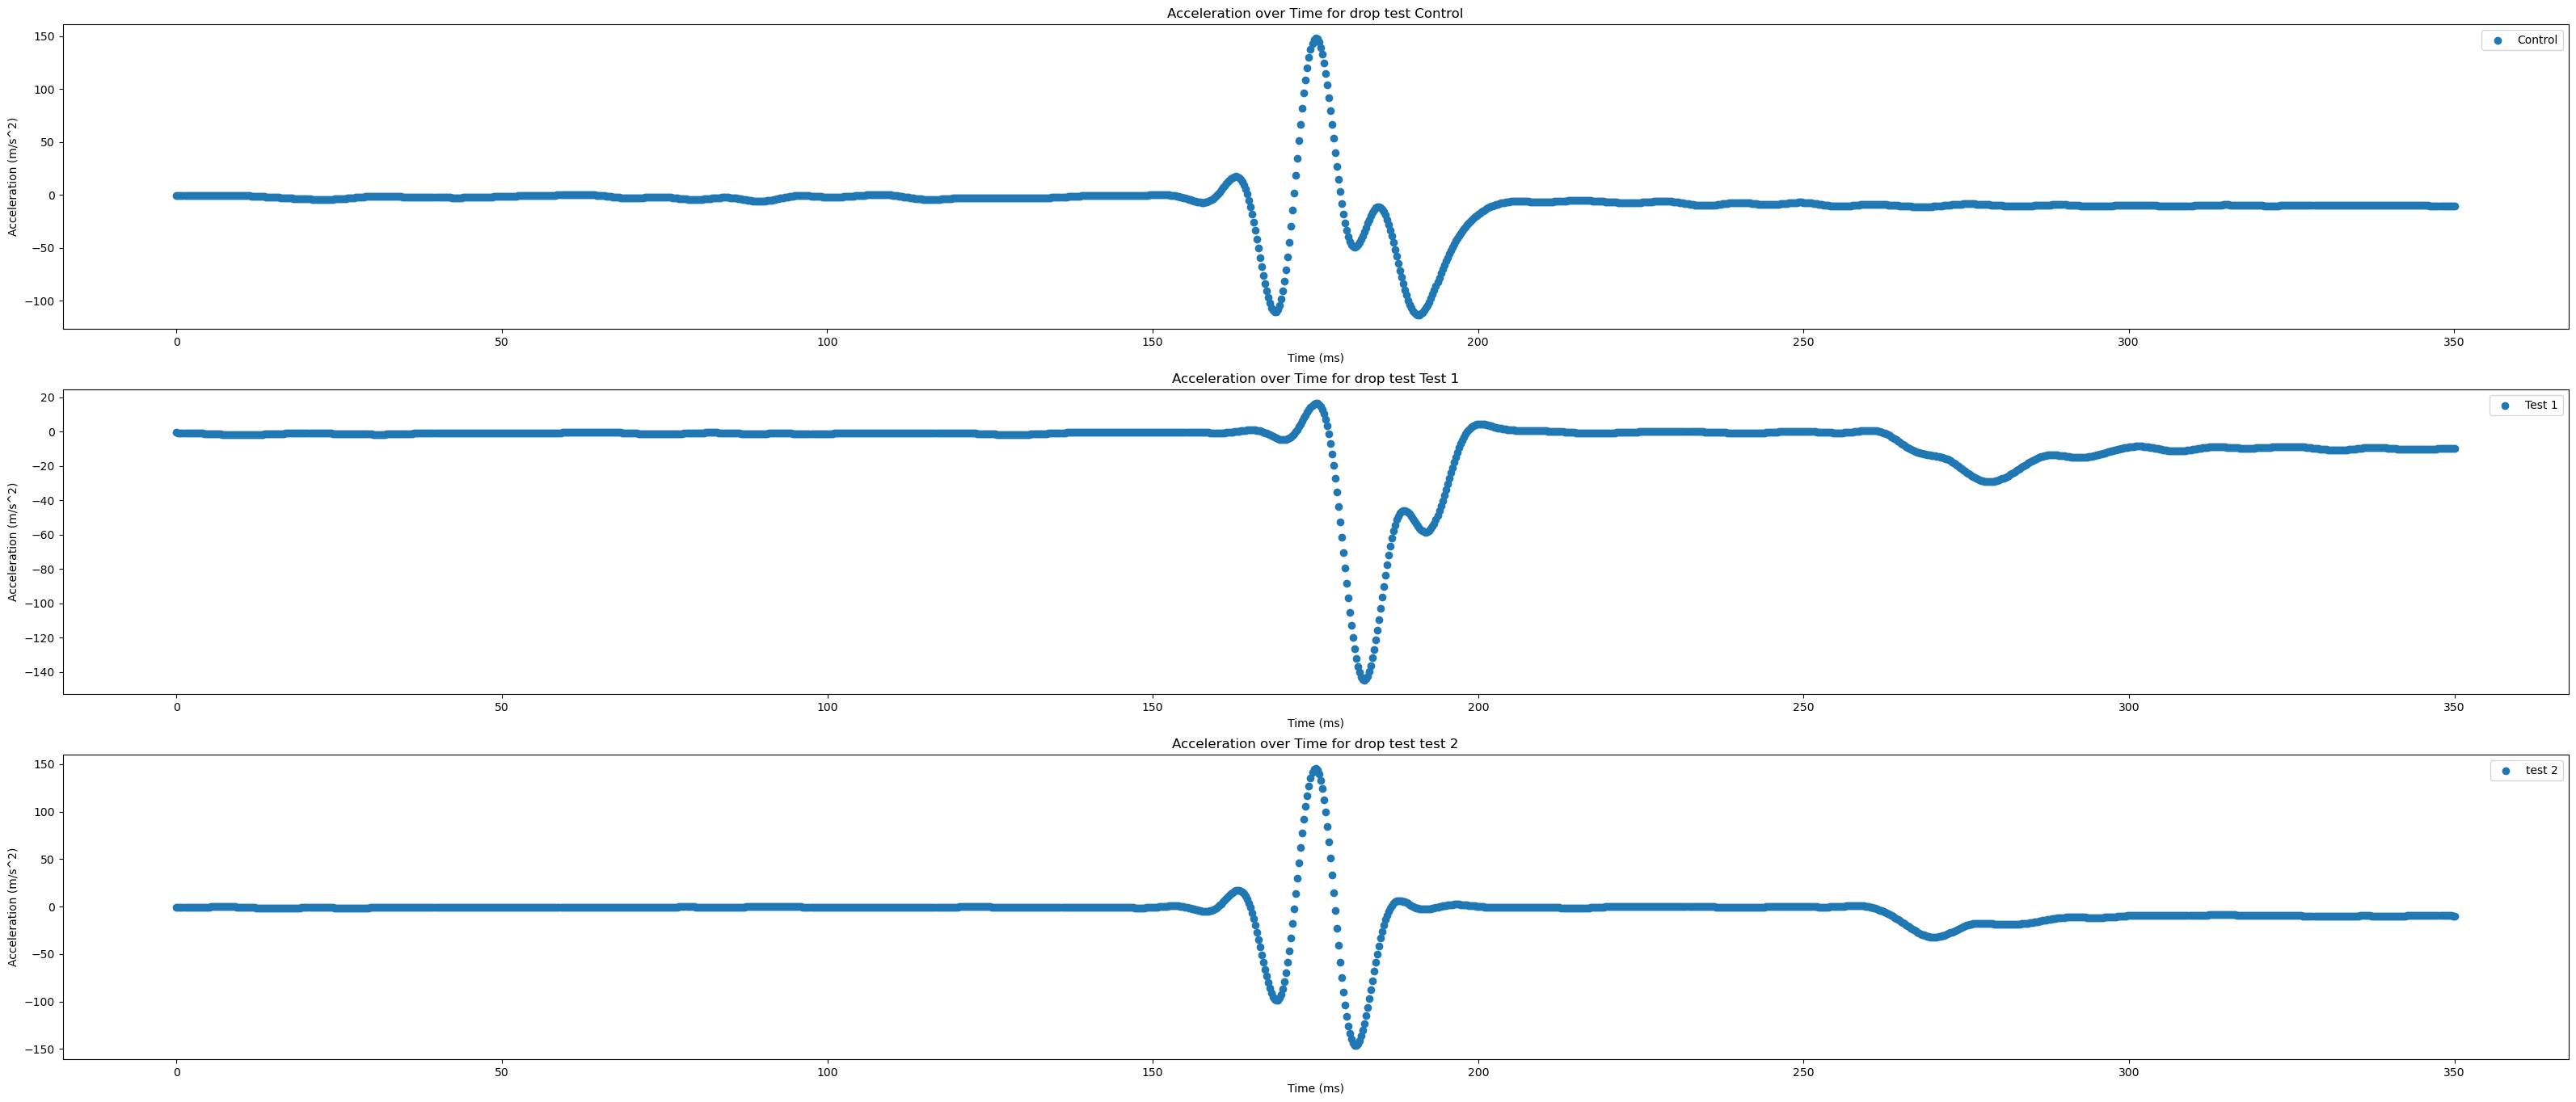

In [81]:
scaling_factor = 2.5
plt.figure(figsize=(16*scaling_factor,9*scaling_factor))

for i,key in enumerate(Accelerometer_dfs.keys()):
    plt.subplot(len(Accelerometer_dfs.keys())+1,1,i+1)
    plt.scatter(x=Accelerometer_dfs[key].TC_data['Time (ms)'],y=Accelerometer_dfs[key].TC_data["Convolved Acceleration m/s^2"],label=key)

    
    plt.ylabel("Acceleration (m/s^2)")
    plt.xlabel("Time (ms)")
 
    plt.legend()
    plt.title('Acceleration over Time for drop test {key}'.format(key=key))